# Machine Learning Model Serving

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
import time
start = time.time()

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [23]:
def save_obj(obj, name ):
    with open('web/'+ name, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [24]:
data = pd.read_csv('./data_f1/data_filtered.csv')

In [25]:
data.head()

,raceId,year,round,circuitId,name_x,date,time_x,url_x,fp1_date,fp1_time,...,lat,lng,alt,url_b,driver,age_at_gp_in_days,driver_home,constructor_home,driver_dnf,constructor_dnf
0,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Nick Heidfeld,12374,0,0,0,1
1,338,2010,2,1,Australian Grand Prix,2010-03-28,06:00:00,http://en.wikipedia.org/wiki/2010_Australian_G...,\N,\N,...,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Robert Kubica,9242,0,0,0,0
2,969,2017,1,1,Australian Grand Prix,2017-03-26,05:00:00,http://en.wikipedia.org/wiki/2017_Australian_G...,\N,\N,...,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Nico Hülkenberg,10812,0,0,0,1
3,989,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,http://en.wikipedia.org/wiki/2018_Australian_G...,\N,\N,...,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Nico Hülkenberg,11176,0,0,0,0
4,1010,2019,1,1,Australian Grand Prix,2019-03-17,05:10:00,http://en.wikipedia.org/wiki/2019_Australian_G...,\N,\N,...,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Nico Hülkenberg,11533,0,0,0,1


In [26]:
dnf_by_driver = data.groupby('driver').sum()['driver_dnf']
driver_race_entered = data.groupby('driver').count()['driver_dnf']
driver_dnf_ratio = (dnf_by_driver/driver_race_entered)
driver_confidence = 1-driver_dnf_ratio
driver_confidence_dict = dict(zip(driver_confidence.index,driver_confidence))

In [27]:
print(driver_confidence.dtypes)

float64


In [28]:
driver_confidence

driver
Adrian Sutil          0.868421
Alexander Albon       0.931034
Alexander Rossi       1.000000
André Lotterer        1.000000
Antonio Giovinazzi    0.918033
                        ...   
Valtteri Bottas       0.950249
Vitaly Petrov         0.879310
Vitantonio Liuzzi     0.783784
Will Stevens          1.000000
Yuki Tsunoda          0.909091
Name: driver_dnf, Length: 74, dtype: float64

In [29]:
driver_confidence_dict_str = {}
for key , value in driver_confidence_dict.items():
    # Correct for New Drivers
    if value == 1.0:
        value = 0.10
    driver_confidence_dict_str[key] = np. array([value])
    print ("%s: %s" % (key, value))
    
save_obj(driver_confidence_dict_str, 'driver_dict' )

Adrian Sutil: 0.868421052631579
Alexander Albon: 0.9310344827586207
Alexander Rossi: 0.1
André Lotterer: 0.1
Antonio Giovinazzi: 0.9180327868852459
Brendon Hartley: 0.88
Bruno Senna: 0.8260869565217391
Carlos Sainz: 0.9012345679012346
Charles Leclerc: 0.8932038834951457
Charles Pic: 0.9487179487179487
Christian Klien: 0.1
Daniel Ricciardo: 0.9523809523809523
Daniil Kvyat: 0.9196428571428571
Esteban Gutiérrez: 0.847457627118644
Esteban Ocon: 0.9545454545454546
Felipe Massa: 0.9161290322580645
Felipe Nasr: 0.925
Fernando Alonso: 0.935483870967742
George Russell: 0.926829268292683
Giedo van der Garde: 0.8421052631578947
Guanyu Zhou: 0.9090909090909091
Heikki Kovalainen: 0.95
Jack Aitken: 0.1
Jaime Alguersuari: 0.9210526315789473
Jarno Trulli: 0.972972972972973
Jean-Éric Vergne: 0.9137931034482758
Jenson Button: 0.9407407407407408
Jolyon Palmer: 0.8571428571428572
Jules Bianchi: 0.9117647058823529
Jérôme d'Ambrosio: 0.95
Kamui Kobayashi: 0.8356164383561644
Karun Chandhok: 0.818181818181818

In [30]:
dnf_by_constructor = data.groupby('constructor').sum()['constructor_dnf']
constructor_race_entered = data.groupby('constructor').count()['constructor_dnf']
constructor_dnf_ratio = (dnf_by_constructor/constructor_race_entered)
constructor_reliability = 1-constructor_dnf_ratio
constructor_reliability_dict = dict(zip(constructor_reliability.index,constructor_reliability))

In [31]:
type(constructor_reliability)

pandas.core.series.Series

In [32]:
constructor_reliability

constructor
Alfa Romeo        0.426070
AlphaTauri        0.483495
Alpine F1         0.546693
Aston Martin      0.617021
Caterham          0.178571
Ferrari           0.880309
HRT               0.156522
Haas F1 Team      0.365854
Lotus             0.078947
Manor Marussia    0.121212
Marussia          0.166667
McLaren           0.623301
Mercedes          0.891683
Red Bull          0.843023
Virgin            0.092105
Williams          0.487427
Name: constructor_dnf, dtype: float64

In [33]:
constructor_reliability_dict_str = {}
for key , value in constructor_reliability_dict.items():
    # Correct value 
    constructor_reliability_dict_str[key] = np. array([value])
    #print ("%s: %s" % (key, value))
    
save_obj(constructor_reliability_dict_str, 'constructor_dict' )

## Analysis F1 Teams and Drivers Probability after last race

In [34]:
data2022 = pd.read_csv('./data_f1/data_filtered_2022.csv')

In [35]:
data2022=data2022.sort_values(by='date')
races = data2022['GP_name'].unique().tolist()
print(races)

['Bahrain International Circuit', 'Jeddah Corniche Circuit', 'Albert Park Grand Prix Circuit', 'Autodromo Enzo e Dino Ferrari', 'Miami International Autodrome', 'Circuit de Barcelona-Catalunya', 'Circuit de Monaco', 'Baku City Circuit', 'Circuit Gilles Villeneuve', 'Silverstone Circuit', 'Red Bull Ring', 'Circuit Paul Ricard', 'Hungaroring', 'Circuit de Spa-Francorchamps', 'Circuit Park Zandvoort', 'Autodromo Nazionale di Monza', 'Marina Bay Street Circuit', 'Suzuka Circuit', 'Circuit of the Americas', 'Autódromo Hermanos Rodríguez', 'Autódromo José Carlos Pace', 'Yas Marina Circuit']


In [36]:
drivers = data2022['driver'].unique().tolist()
print(drivers)

['Yuki Tsunoda', 'Nicholas Latifi', 'Daniel Ricciardo', 'Lando Norris', 'Carlos Sainz', 'Charles Leclerc', 'Fernando Alonso', 'Esteban Ocon', 'Lewis Hamilton', 'George Russell', 'Sergio Pérez', 'Max Verstappen', 'Nico Hülkenberg', 'Lance Stroll', 'Valtteri Bottas', 'Guanyu Zhou', 'Kevin Magnussen', 'Mick Schumacher', 'Alexander Albon', 'Pierre Gasly', 'Sebastian Vettel', 'Nyck de Vries']


In [37]:
constructors = data2022['constructor'].unique().tolist()
print(constructors)

['AlphaTauri', 'Williams', 'McLaren', 'Ferrari', 'Alpine F1', 'Mercedes', 'Red Bull', 'Aston Martin', 'Alfa Romeo', 'Haas F1 Team']


In [38]:
results = {'race': [],
          'driver':[],
          'constructor':[],
          'points':[]}
for race in races:
    for driver in drivers:
        clst = data2022.loc[(data2022['GP_name']==race)&(data2022['driver']==driver)]['constructor'].unique().tolist()
        plst = data2022.loc[(data2022['GP_name']==race)&(data2022['driver']==driver)]['points'].unique().tolist()
        for c in clst:
            for p in plst:
                results['race'].append(race)
                results['driver'].append(driver)
                results['constructor'].append(c)
                results['points'].append(p)


In [39]:
df2021= pd.DataFrame(results)
print (df2021)

                              race            driver   constructor  points
0    Bahrain International Circuit      Yuki Tsunoda    AlphaTauri     4.0
1    Bahrain International Circuit   Nicholas Latifi      Williams     0.0
2    Bahrain International Circuit  Daniel Ricciardo       McLaren     0.0
3    Bahrain International Circuit      Lando Norris       McLaren     0.0
4    Bahrain International Circuit      Carlos Sainz       Ferrari    18.0
..                             ...               ...           ...     ...
435             Yas Marina Circuit   Kevin Magnussen  Haas F1 Team     0.0
436             Yas Marina Circuit   Mick Schumacher  Haas F1 Team     0.0
437             Yas Marina Circuit   Alexander Albon      Williams     0.0
438             Yas Marina Circuit      Pierre Gasly    AlphaTauri     0.0
439             Yas Marina Circuit  Sebastian Vettel  Aston Martin     1.0

[440 rows x 4 columns]


In [40]:
print(f'Number of Races done: {len(races)}')

Number of Races done: 22


In [41]:
pts_by_driver = df2021.groupby('driver').sum()['points']
driver_race = df2021.groupby('driver').count()['race']
driver_points_ratio = (pts_by_driver/len(races)/25.0)
driver_points_dict = dict(zip(driver_points_ratio.index,driver_points_ratio))

In [42]:
driver_points_dict

{'Alexander Albon': 0.007272727272727273,
 'Carlos Sainz': 0.41454545454545455,
 'Charles Leclerc': 0.5290909090909091,
 'Daniel Ricciardo': 0.061818181818181814,
 'Esteban Ocon': 0.16181818181818183,
 'Fernando Alonso': 0.14727272727272728,
 'George Russell': 0.4763636363636363,
 'Guanyu Zhou': 0.010909090909090908,
 'Kevin Magnussen': 0.038181818181818185,
 'Lance Stroll': 0.03272727272727273,
 'Lando Norris': 0.2109090909090909,
 'Lewis Hamilton': 0.42363636363636364,
 'Max Verstappen': 0.7872727272727273,
 'Mick Schumacher': 0.021818181818181816,
 'Nicholas Latifi': 0.0036363636363636364,
 'Nico Hülkenberg': 0.0,
 'Nyck de Vries': 0.0036363636363636364,
 'Pierre Gasly': 0.04181818181818182,
 'Sebastian Vettel': 0.06727272727272728,
 'Sergio Pérez': 0.5290909090909091,
 'Valtteri Bottas': 0.08545454545454545,
 'Yuki Tsunoda': 0.021818181818181816}

In [43]:
pts_by_constructor = df2021.groupby('constructor').sum()['points']
constructor_race = df2021.groupby('constructor').count()['race']
constructor_pts_ratio = (pts_by_constructor/len(races)/(25.0+18.0))
constructor_points_dict = dict(zip(constructor_pts_ratio.index,constructor_pts_ratio))
#constructor_points_dict = dict(zip(pts_by_constructor.index,pts_by_constructor))

In [44]:
constructor_points_dict

{'Alfa Romeo': 0.056025369978858354,
 'AlphaTauri': 0.03699788583509513,
 'Alpine F1': 0.17970401691331925,
 'Aston Martin': 0.05813953488372093,
 'Ferrari': 0.5486257928118393,
 'Haas F1 Team': 0.03488372093023256,
 'McLaren': 0.15856236786469344,
 'Mercedes': 0.5232558139534884,
 'Red Bull': 0.7653276955602536,
 'Williams': 0.008456659619450317}

In [45]:
driver_pred_dict_str = {}
for key , value in driver_points_dict.items():
    driver_pred_dict_str[key] = np. array([value])
    #print ("%s: %s" % (key, value))

In [46]:
save_obj(driver_pred_dict_str, 'driver_pred_dict' )

In [47]:
constructor_pred_dict_str = {}
for key , value in constructor_points_dict.items():
    constructor_pred_dict_str[key] = np. array([value])
    #print ("%s: %s" % (key, value))

In [48]:
save_obj(constructor_pred_dict_str, 'constructor_pred_dict' )

## Generate Qualifying dataset for Predictor

In [49]:
qualif = {'race': [],
          'driver':[],
          'quali_pos':[]
         }
for race in races:
    for driver in drivers:
        qlst = data2022.loc[(data2022['GP_name']==race)&(data2022['driver']==driver)]['quali_pos'].unique().tolist()
        for q in qlst:
            qualif['race'].append(race)
            qualif['driver'].append(driver)
            qualif['quali_pos'].append(q)


In [50]:
qualif2022= pd.DataFrame(qualif)
print (qualif2022)

                              race            driver  quali_pos
0    Bahrain International Circuit      Yuki Tsunoda         16
1    Bahrain International Circuit   Nicholas Latifi         20
2    Bahrain International Circuit  Daniel Ricciardo         18
3    Bahrain International Circuit      Lando Norris         13
4    Bahrain International Circuit      Carlos Sainz          3
..                             ...               ...        ...
435             Yas Marina Circuit   Kevin Magnussen         16
436             Yas Marina Circuit   Mick Schumacher         12
437             Yas Marina Circuit   Alexander Albon         19
438             Yas Marina Circuit      Pierre Gasly         17
439             Yas Marina Circuit  Sebastian Vettel          9

[440 rows x 3 columns]


In [51]:
qualif2022.to_csv('./data_f1/qualif_filtered.csv', index = False)

In [52]:
# last race
last_race = races[len(races)-1]
print(last_race)

Yas Marina Circuit


In [53]:
qualif_last= qualif2022[qualif2022['race']==last_race]
print (qualif_last)

                   race            driver  quali_pos
420  Yas Marina Circuit      Yuki Tsunoda         11
421  Yas Marina Circuit   Nicholas Latifi         20
422  Yas Marina Circuit  Daniel Ricciardo         13
423  Yas Marina Circuit      Lando Norris          7
424  Yas Marina Circuit      Carlos Sainz          4
425  Yas Marina Circuit   Charles Leclerc          3
426  Yas Marina Circuit   Fernando Alonso         10
427  Yas Marina Circuit      Esteban Ocon          8
428  Yas Marina Circuit    Lewis Hamilton          5
429  Yas Marina Circuit    George Russell          6
430  Yas Marina Circuit      Sergio Pérez          2
431  Yas Marina Circuit    Max Verstappen          1
432  Yas Marina Circuit      Lance Stroll         14
433  Yas Marina Circuit   Valtteri Bottas         18
434  Yas Marina Circuit       Guanyu Zhou         15
435  Yas Marina Circuit   Kevin Magnussen         16
436  Yas Marina Circuit   Mick Schumacher         12
437  Yas Marina Circuit   Alexander Albon     

In [35]:
qualif_last.to_csv('./data_f1/qualif_lastrace.csv', index = False)

## Generate Machine Learning Model: Random Forest 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

def save_model(model, model_filepath):
    """
    Export your model as a pickle file.
    Saves trained model as pickle file to be loaded later.
    
    """
    
    filename = model_filepath
    pickle.dump(model, open(filename, 'wb'))

In [37]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
plt.style.use('seaborn')


In [38]:
def position_index(x):
    if x<4:
        return 1
    if x>10:
        return 3
    else :
        return 2

In [39]:
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
min_samples_split = [2,5,8,10,15,20]
min_samples_leaf = [1,2,4,6,8,10]
bootstrap = [True,False]

random_parms = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap
                }

In [40]:
# Dataset generated in previous phase
data = pd.read_csv('./data_f1/cleaned_data.csv')

In [41]:
x = data[['GP_name','quali_pos','constructor','driver','position','driver_confidence','constructor_reliability','active_driver','active_constructor']]

In [42]:
x = x[x['active_constructor']==1]
x = x[x['active_driver']==1]

In [43]:
sc  = StandardScaler()
le = LabelEncoder()
x['GP_name'] = le.fit_transform(x['GP_name'])
x['constructor'] = le.fit_transform(x['constructor'])
x['driver'] = le.fit_transform(x['driver'])
x['GP_name'] = le.fit_transform(x['GP_name'])
X = x.drop(['position','active_driver','active_constructor'],1)
y = x['position'].apply(lambda x: position_index(x))

In [44]:
rf_rand = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf_rand,param_distributions=random_parms,n_iter=100,cv=10,verbose=2,n_jobs=-1)
rf_random.fit(X,y)
rf_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'n_estimators': 1800,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [45]:
rf = RandomForestClassifier(n_estimators=100,min_samples_split=20,min_samples_leaf=1,max_features='sqrt',max_depth=90,bootstrap=True)
kf = StratifiedKFold(n_splits=10,random_state=None,shuffle=False)
for train_index,test_index in kf.split(X,y):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]

In [46]:
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
cnf_mat_rf = confusion_matrix(y_test,y_pred_rf)
cnf_mat_rf = cnf_mat_rf/cnf_mat_rf.sum()

In [47]:
model_filepath='./models/{}.pkl'.format('RandomForestClassifier')
print('Saving model ...\n    MODEL: {}'.format(model_filepath))
save_model(rf, model_filepath)

Saving model ...
    MODEL: ./models/RandomForestClassifier.pkl


In [48]:
print(X.columns)

Index(['GP_name', 'quali_pos', 'constructor', 'driver', 'driver_confidence',
       'constructor_reliability'],
      dtype='object')


In [49]:
importances = rf.feature_importances_
importances

array([0.0206526 , 0.76996451, 0.05246466, 0.03000016, 0.03745552,
       0.08946256])

# Analysis of Machine Learning Model Serving

In [50]:
import pickle

model_filepath='./models/{}.pkl'.format('RandomForestClassifier')

# load model using pickle l from disk
print('Loading model ...\n    MODEL: {}'.format(model_filepath))
loaded_model = pickle.load(open(model_filepath, 'rb'))
# model = joblib.load(model_filepath)


Loading model ...
    MODEL: ./models/RandomForestClassifier.pkl


In [51]:
importances = loaded_model.feature_importances_
importances

array([0.0206526 , 0.76996451, 0.05246466, 0.03000016, 0.03745552,
       0.08946256])

In [52]:
feature_names=['GP_name', 'quali_pos', 'constructor', 'driver', 'driver_confidence',
       'constructor_reliability']

In [53]:
import time
import numpy as np

start_time = time.time()
std = np.std([
    tree.feature_importances_ for tree in loaded_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.007 seconds


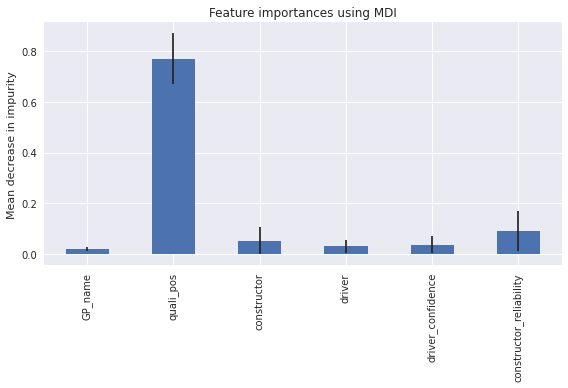

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [55]:
len(loaded_model.estimators_)

100

### The plot of first Decision Tree:

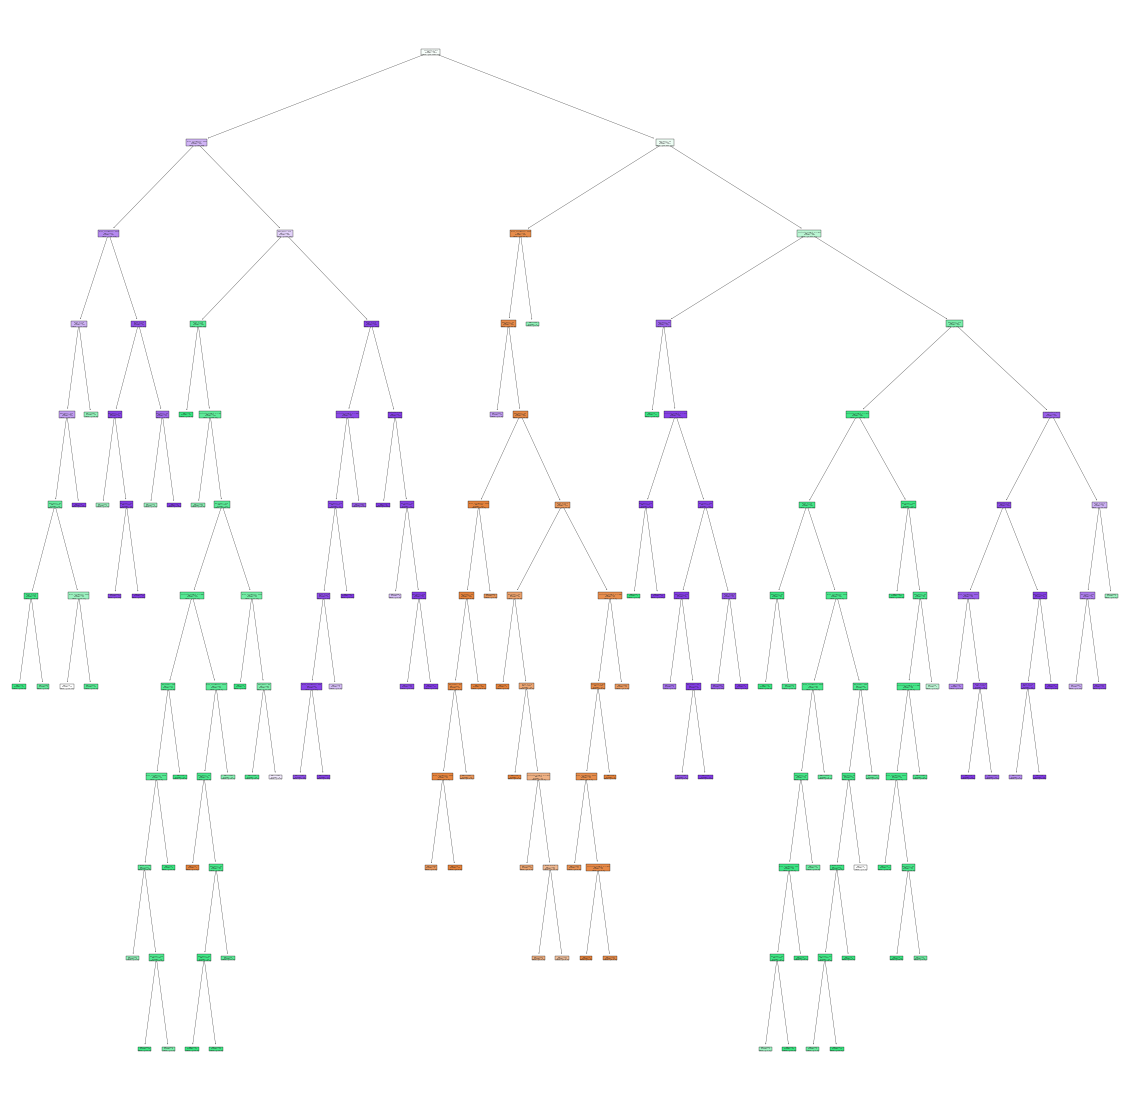

In [56]:
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(loaded_model.estimators_[0], feature_names=feature_names, filled=True)

Let’s check the depth of the first tree from the Random Forest:

In [57]:
loaded_model.estimators_[0].tree_.max_depth

11

Our first tree has max_depth=14. Other trees have similar depth. You can check for the different trees.

### The plot of Second Decision Tree:

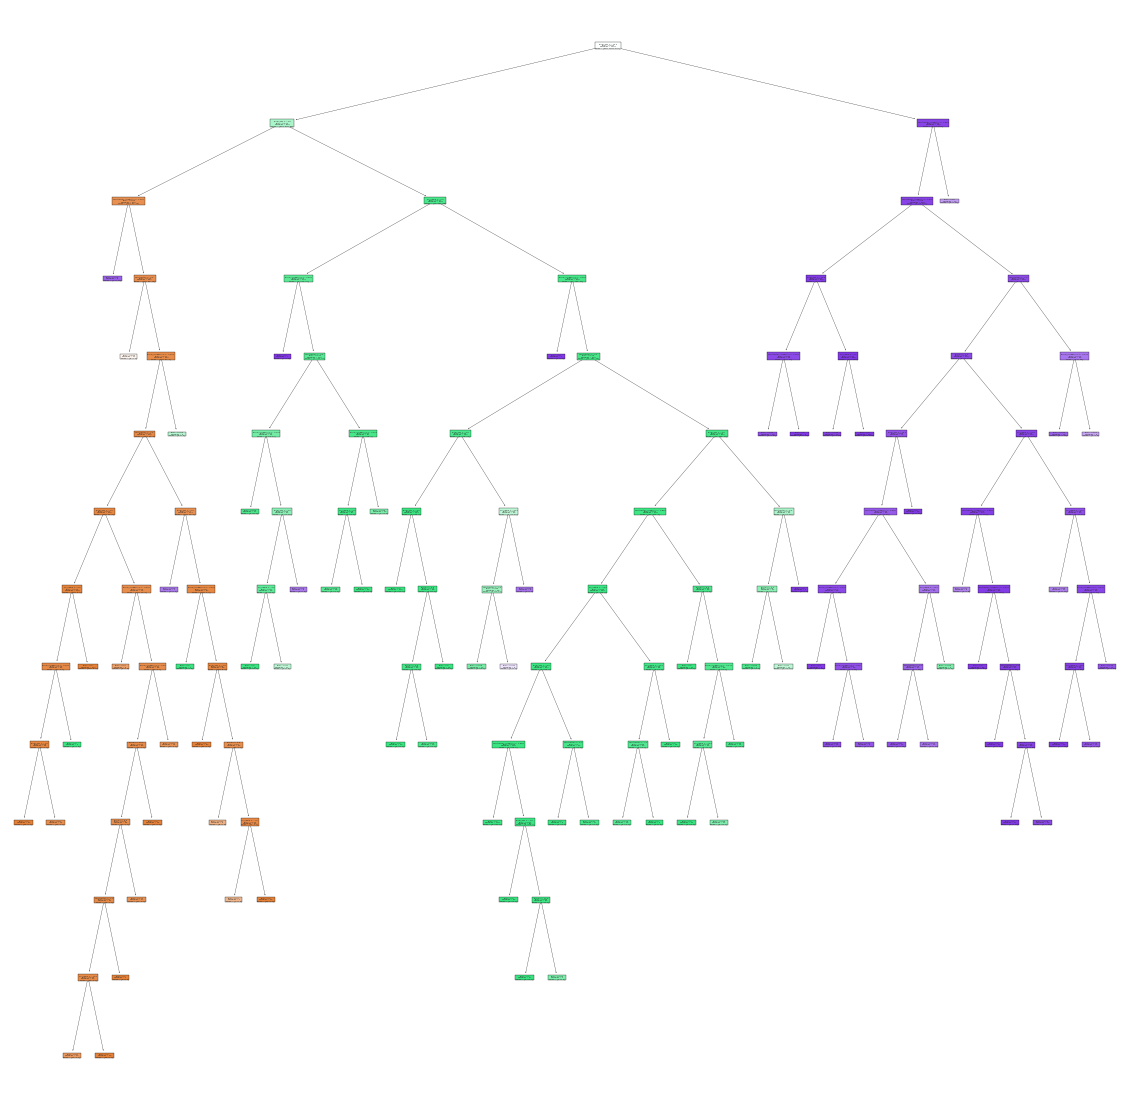

In [58]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(loaded_model.estimators_[1], feature_names=feature_names, filled=True)

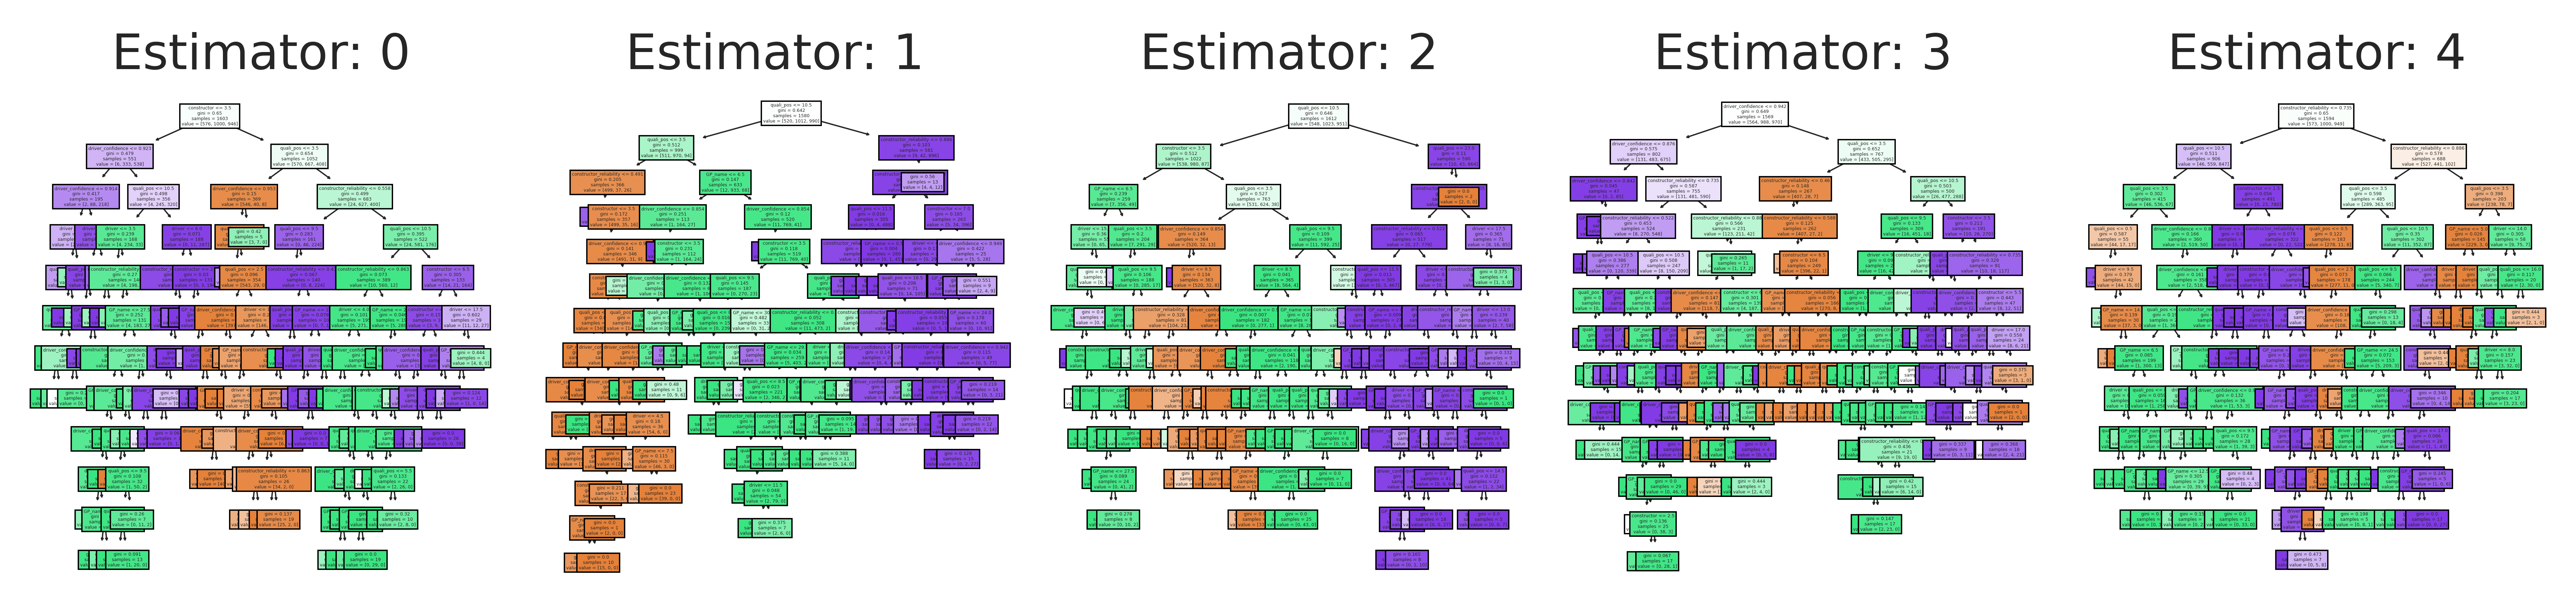

In [59]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(loaded_model.estimators_[index],
                   feature_names = feature_names, 
                   # class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)    

In [60]:
end = time.time()

In [61]:
import datetime
str(datetime.timedelta(seconds=(end - start)))

'0:25:16.407969'

In [62]:
print(str(end - start)+" seconds")

1516.4079694747925 seconds


## Let's See The Results

To see the results of the lab, you'll need to start the web server using Terminal.

1. In the menu at the top of the page, select **File->New->Terminal**.
2. Enter the following commands, hitting return after each one (feel free to copy and paste)

        cd /home/opc/redbull-analytics-hol/beginners/web
        source /home/opc/redbullenv/bin/activate
        python3 app.py
3. Open a web browser to the public IP of your Jupyter Lab, but use port 8443 instead of port 8001:

        https://xxx.xxx.xxx.xxx:8443